In [ ]:
#from google.colab import drive
#drive.mount('/content/drives/', force_remount=True)

Mounted at /content/drives/


In [ ]:
%%html
<marquee style='width: 30%; color: blue;'><b>MOD (Mother of Dataset)</b></marquee>

# Churn Prediction
### Oleh Kelompok MOD (Mother of Dataset):
 * Ashadah (ashadah44@gmail.com)
 * Christoforus Venus (venus001@binus.ac.id)
 * Dicky Novanda Syaifullah (dr.dicno@gmail.com)
 * Donny Prayudha Stannia (donny2ndgen@gmail.com)
 * Jason Joseph Tjiadi (jasonjosephtjiadi@gmail.com)
 * Ryan Setiawan (koalaozzie15@gmail.com)
 * Syafiqa Pramunadipta (syafiqapramuna@gmail.com)
 * Tri Oktavia Saraswati (strioktavia@gmail.com)

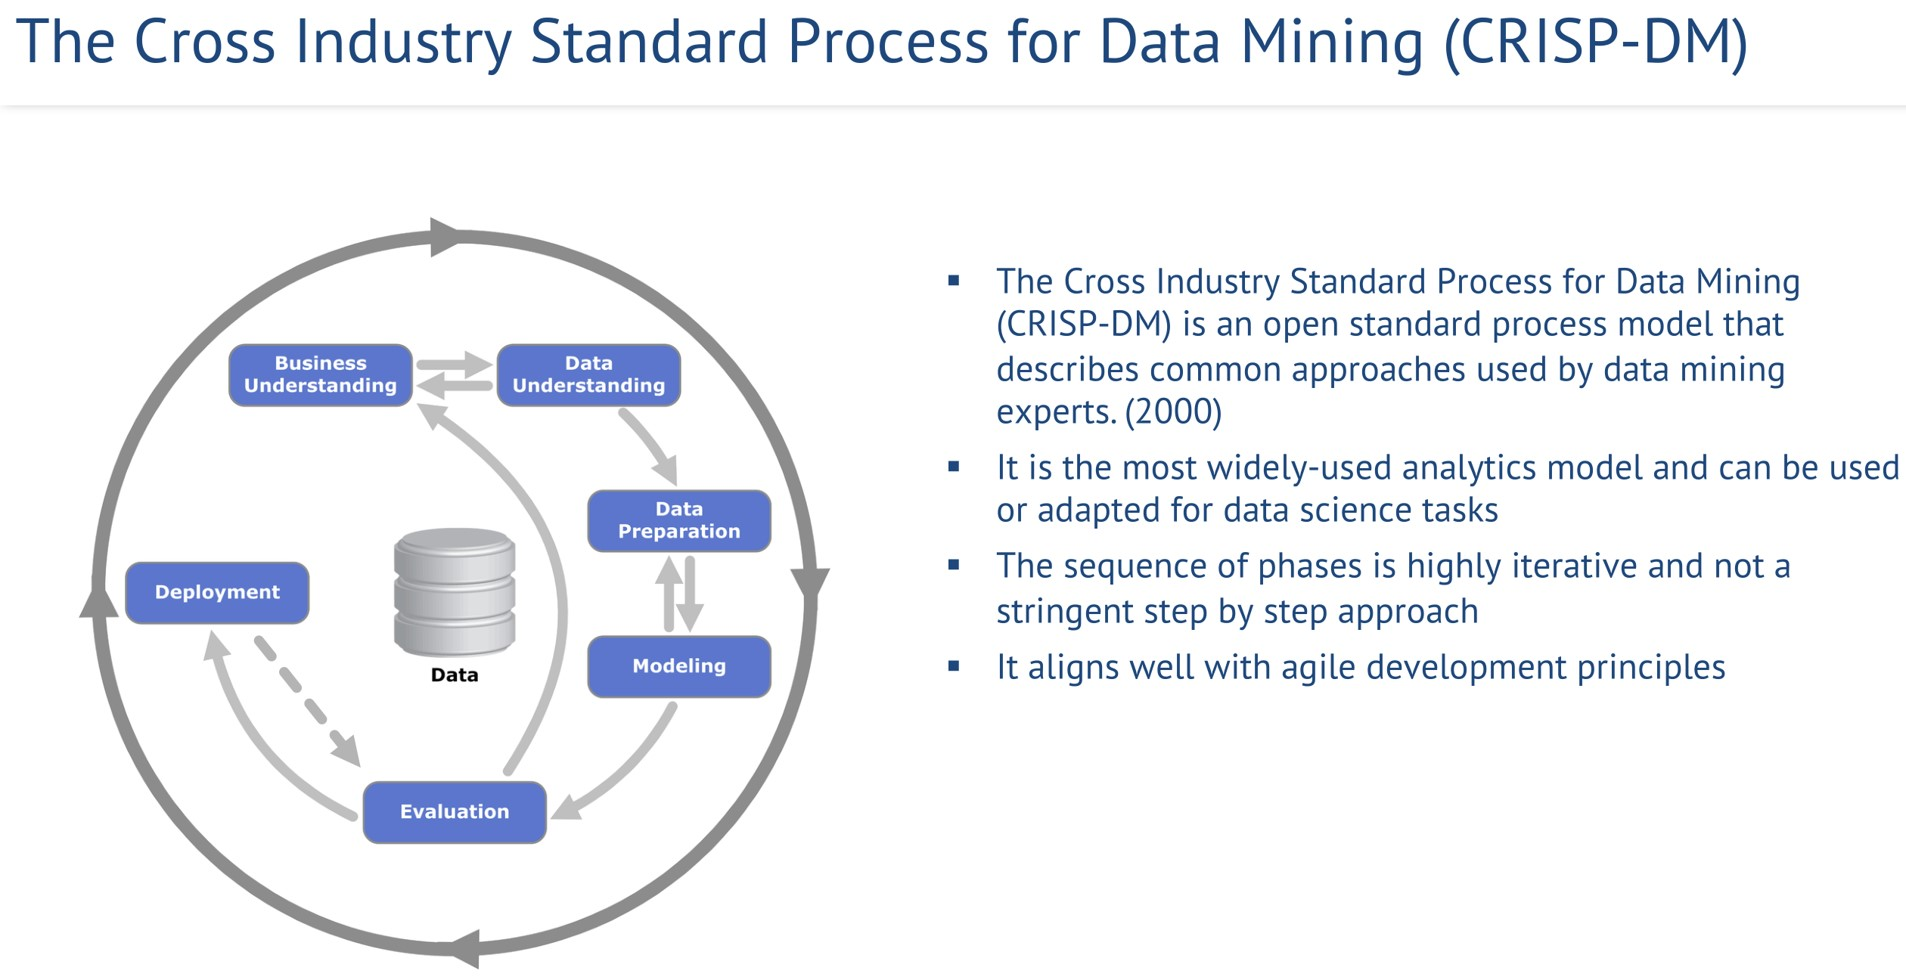

In [ ]:
#import cv2
#from google.colab.patches import cv2_imshow
#img=cv2.imread('/content/drives/My Drive/Colab Notebooks/CRISP_DM.jpg', cv2.IMREAD_UNCHANGED)

#cv2_imshow(img)

## CRISP-DM (Cross Industry Standard Process for Data Mining) Methodology 
Metodologi CRISP-DM menyediakan pendekatan terstruktur untuk merencanakan proyek penambangan data, yang biasa juga digunakan untuk proyek data science. 

Enam langkah pada metodologi CRIPSP-DM adalah:
1.  **Business understanding**: berfokus pada pemahaman tujuan dan persyaratan proyek dari perspektif bisnis, dan kemudian menerjemahkan informasi ini ke dalam definisi masalah Ilmu Data.
2.  **Data understanding**: berfokus pada pengumpulan dan pengenalan data; ini relevan untuk mengidentifikasi masalah kualitas data, menemukan wawasan pertama ke dalam data dan membentuk hipotesis.
3.  **Data preparation**: bertujuan untuk mengubah data mentah menjadi kumpulan data akhir yang dapat digunakan sebagai input untuk teknik pemodelan (misalnya, algoritma Machine Learning).
4.  **Modeling**: melibatkan penerapan teknik pemodelan yang berbeda untuk dataset untuk menghasilkan satu set calon model.
5.  **Evaluation**: setelah model dibangun, model tersebut perlu diuji untuk memastikan model tersebut digeneralisasikan terhadap data yang tidak terlihat dan bahwa semua tujuan bisnis utama telah dipertimbangkan (misalnya, model akhir harus adil, dapat diinterpretasikan oleh manusia, dan mencapai akurasi X % lebih tinggi dari solusi klien saat ini). Hasil dari tahap ini adalah model juara.
6.  **Deployment**: model juara dikerahkan ke dalam produksi sehingga dapat digunakan untuk membuat prediksi pada data yang tidak terlihat. Semua langkah persiapan data disertakan sehingga model akan memperlakukan data mentah baru dengan cara yang sama seperti selama pengembangan model.



# Business Understanding

### Problem Statement: 
Dari data pelanggan suatu perusahaan ecommerce terdapat 17% pelanggan yang melakukan churn. Oleh karena itu perusahaan ingin  dapat mempertahankan konsumen agar mereka tetap setia membeli barang dari perusahaan mereka. 

### Goal:
Perusahaan perlu melakukan prediksi untuk menentukan mana pelanggan yang loyal dan tidak loyal, sehingga nantinya perusahaan dapat menentukan strategi yang tepat untuk meningkatkan loyalitas dan menurunkan churn rate.

### Business metric:
Metrik yang digunakan adalah Customer Churn Rate (Churn Rate).
Churn rate adalah persentase pelanggan yang tidak memperpanjang langganan atau berhenti membeli selama periode waktu tertentu, seperti sebulan, triwulan atau setahun.

### Objective:
*  Membangun model machine learning untuk melakukan prediksi pelanggan yang churn.
*  Memberikan rekomendasi bisnis sehingga perusahaan dapat mencapai meningkatkan loyalitas dan menurunkan churn rate.

# Data Understanding

### Data yang digunakan

Dataset berupa file Excel yang bersumber dari: https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction 

### Deskripsi Variabel
* **Churn:** Churn flag, 1 berarti pelanggan pergi dan 0 berarti pelanggan menggunakan layanan
* **Tenure:** Tenure pelanggan dalam organisasi
* **PreferredLoginDevice:** Perangkat login pilihan pelanggan seperti laptop atau ponsel
* **CityTier:** Tingkat kota(1,2,3)
* **WarehouseToHome:** Jarak antara gudang ke rumah pelanggan
* **PreferredPaymentMode:** Metode pembayaran pilihan pelanggan
* **Gender:** Jenis Kelamin Pelanggan
* **HourSpendOnApp:** Jumlah jam yang dihabiskan untuk mengakses aplikasi seluler atau situs web
* **NumberOfDeviceRegistered:** Jumlah total perangkat yang terdaftar pada pelanggan tertentu
* **PreferedOrderCat:** Kategori pesanan pilihan pelanggan bulan lalu
* **SatisfactionScore:** Skor kepuasan pelanggan atas layanan
* **MaritalStatus:** Status perkawinan pelanggan
* **NumberOfAddress:** Jumlah total alamat yang ditambahkan pada pelanggan tertentu
* **Complain:** Keluhan telah diajukan pada bulan lalu
* **OrderAmountHikeFromlastYear:** Persentase peningkatan pesanan dari tahun lalu
* **CouponUsed:** Jumlah total kupon yang telah digunakan bulan lalu
* **OrderCount:** umlah total pesanan yang telah dilakukan pada bulan lalu
* **DaySinceLastOrder:** Hari Sejak pesanan terakhir oleh pelanggan
* **CashbackAmount:** Rata-rata cashback bulan lalu


In [1]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
#df = pd.read_excel('/content/drives/My Drive/Colab Notebooks/E Commerce Dataset.xlsx', sheet_name='E Comm')
df = pd.read_excel('E Commerce Dataset.xlsx', sheet_name='E Comm')

# Exploratory Data Analysis (EDA)
Exploratory Data Analysis memungkinkan analyst memahami isi data yang digunakan, mulai dari distribusi, frekuensi, korelasi dan lainnya.

In [ ]:
# Tampilkan bentuk dari dataset
print(df.shape)

(5630, 20)


In [ ]:
# Tampilkan nama kolom
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
# Tampilkan 5 data teratas
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
# Tampilkan 5 data terbawah
df.tail()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90
5629,55630,0,8.0,Mobile Phone,1,15.0,Credit Card,Male,3.0,2,Laptop & Accessory,3,Married,4,0,13.0,2.0,2.0,3.0,169.04


In [ ]:
# Tampilkan tipe data
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [ ]:
# Tampilkan informasi dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# Menghitung nilai yang unik pada setiap kolom
df.nunique()

CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

In [4]:
# Pengulangan kolom untuk mendapatkan nilai unik per kolom
for i in df.columns:
    if df[i].dtype == 'object':
       print(f"Nilai unik kolom {i} ada: {df[i].nunique()}")
       print(f"{df[i].unique()}'\n")
    else:
       pass

Nilai unik kolom PreferredLoginDevice ada: 3
['Mobile Phone' 'Phone' 'Computer']'

Nilai unik kolom PreferredPaymentMode ada: 7
['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']'

Nilai unik kolom Gender ada: 2
['Female' 'Male']'

Nilai unik kolom PreferedOrderCat ada: 6
['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']'

Nilai unik kolom MaritalStatus ada: 3
['Single' 'Divorced' 'Married']'



In [ ]:
# Menampilkan adanya data duplikat
df.duplicated().any()

False

In [ ]:
# Menampilkan jumlah data yang duplikat
df.duplicated().sum()

0

In [ ]:
# Menampilkan jumlah data yang null
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
# Persen dari missing value
df.isna().mean().round(4) * 100

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

In [ ]:
# Menampilkan jumlah nilai dari masing-masing variabel kategori
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

PreferredLoginDevice

the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [ ]:
# Tampilkan statistik deskriptif dengan format angka 2 digit dibelakang koma dan melakukan transpose
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.50,1625.39,50001.0,51408.25,52815.50,54222.75,55630.00
Churn,5630.0,0.17,0.37,0.0,0.00,0.00,0.00,1.00
Tenure,5366.0,10.19,8.56,0.0,2.00,9.00,16.00,61.00
CityTier,5630.0,1.65,0.92,1.0,1.00,1.00,3.00,3.00
WarehouseToHome,5379.0,15.64,8.53,5.0,9.00,14.00,20.00,127.00
HourSpendOnApp,5375.0,2.93,0.72,0.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5630.0,3.69,1.02,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5630.0,3.07,1.38,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5630.0,4.21,2.58,1.0,2.00,3.00,6.00,22.00
Complain,5630.0,0.28,0.45,0.0,0.00,0.00,1.00,1.00


### Kesimpulan hasil eksplorasi dataset:
*  Dataset memiliki 20 kolom dan 5630 baris, dari kolom tersebut kita bisa melakukan penghapusan kolom untuk kolom CustomerID (kolom ID) karena tidak dibutuhkan dalam pembuatan model.
*  Tipe data pada dataset tidak ada anomali.
*  Pada dataset untuk variabel kategori tidak ada masalah.
*  Pada kolom PreferredPaymentMode, ada nilai Cash on Delivery dan COD, untuk value bisa dipilih COD sedangkan yang lain bisa diubah menjadi COD. Sedangkan untuk value CC diasumsikan sebagai Credit Card, sehingga nilainya bisa diubah menjadi Credit Card.
*  Pada kolom PreferredLoginDevice, ada nilai Phone yang bisa diubah menjadi Mobile Phone.
*  Pada kolom PreferedOrderCat, ada nilai Mobile yang bisa diubah menjadi Mobile Phone
*  Terdapat 7 kolom yang mempunyai nilai data null, yaitu: 
   1.  Tenure dengan total nilai 264, 
   2.  WarehouseToHome dengan total nilai 251, 
   3.  HourSpendOnApp dengan total nilai 255, 
   4.  OrderAmountHikeFromlastYear dengan total nilai 265, 
   5.  CouponUsed dengan total nilai 256, 
   6.  OrderCount dengan total nilai 258, 
   7.  DaySinceLastOrder dengan total nilai 307.




### Persiapan Univariate Analysis dan Bivariate Analysis
*  Setelah melakukan eksplorasi dataset, ada proses drop kolom dan pengabungan value yang ada di 3 kolom
*  Kenapa dilakukan?
1.  Karena pada tahap membuat visualisasi untuk mengali insight dari data, diperlukan dataset yang siap digunakan, dalam hal ini untuk menambah kejelasan atau mengurangi ambigu dalam proses mendapatkan insight.
2.  Mentor kelompok 4 - Mother of Dataset, dalam hal ini Mas Maulana, membolehkan melakukan drop kolom yang tidak perlu dan pengabungan value yang sama pada 3 kolom pada tahapan data understanding/membuat EDA atau pada tahapan data preparation/data pre-processing.
3.  Dalam membuat proyek Churn Prediction digunakan Framework CRISP-DM, dimana ketika sudah selesai tahap business understanding dan melakukan data understanding kemudian ke tahap data preparation. Pada tahap data preparation, kita akan melakukan drop kolom yang tidak perlu dan pengabungan value yang sama pada 2 kolom. Setelah dilakukan proses tersebut kita kembali ke proses data understanding, agar hasil insight lebih jelas. Jadi disini ada proses iterasi.

In [5]:
# Membuat copy data frame
df1=df.copy()

In [22]:
# Menghapus kolom CustomerID
df1.drop(['CustomerID'],axis=1, inplace=True)
df1

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


In [23]:
### Mengganti value pada kolom PreferredPaymentMode, PreferredLoginDevice, dan PreferedOrderCat
df1['PreferredPaymentMode'] = df1['PreferredPaymentMode'].replace(['Cash on Delivery'],'COD')
df1['PreferredPaymentMode'] = df1['PreferredPaymentMode'].replace(['CC'],'Credit Card')
df1['PreferredLoginDevice'] = df1['PreferredLoginDevice'].replace(['Phone'],'Mobile Phone')
df1['PreferedOrderCat'] = df1['PreferedOrderCat'].replace(['Mobile'],'Mobile Phone')
df1

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


### Univariate Analysis — analisis deskriptif dengan satu variabel.
Metode untuk melakukan analisis univariat akan tergantung pada apakah jenis variabel kategorikal atau numerik.
*  Variabel numerik: kita perlu memahami tendensi sentral dan penyebaran variabel. Ini diukur dengan menggunakan berbagai metode visualisasi metrik statistik.
*  Variabel kategori: kita menganalisis terhadap kategori yang berbeda.

In [24]:
# Membuat list dengan tipe variabel kategori dan numerik dari dataset
df2=df1.copy()

cat=[]
num=[]
for i in df2.columns:
  if df2[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('Tipe Variabel Kategori = ',cat)
print('Tipe Variabel Numerik = ',num)

Tipe Variabel Kategori =  ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
Tipe Variabel Numerik =  ['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [26]:
df2[cat].describe().T

,count,unique,top,freq
PreferredLoginDevice,5630,2,Mobile Phone,3996
PreferredPaymentMode,5630,5,Debit Card,2314
Gender,5630,2,Male,3384
PreferedOrderCat,5630,5,Mobile Phone,2080
MaritalStatus,5630,3,Married,2986


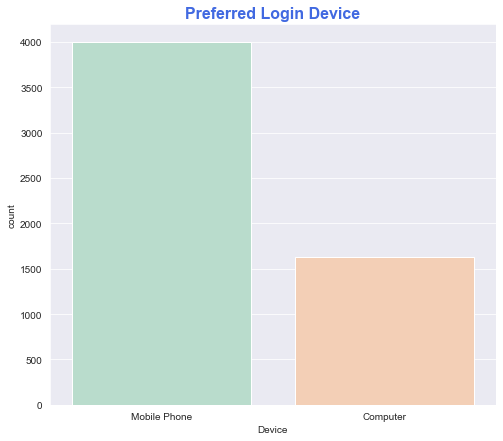

In [30]:
# Chart Perangkat Pilihan Utama Pelanggan
plt.figure(figsize = (8,7))
plt.title('Preferred Login Device', fontsize = 16, fontweight = 'bold', color = 'royalblue')
sns.set_style('darkgrid')
sns.countplot(x  = 'PreferredLoginDevice',  data = df2, palette = 'Pastel2')
plt.xlabel('Device')
plt.show()

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


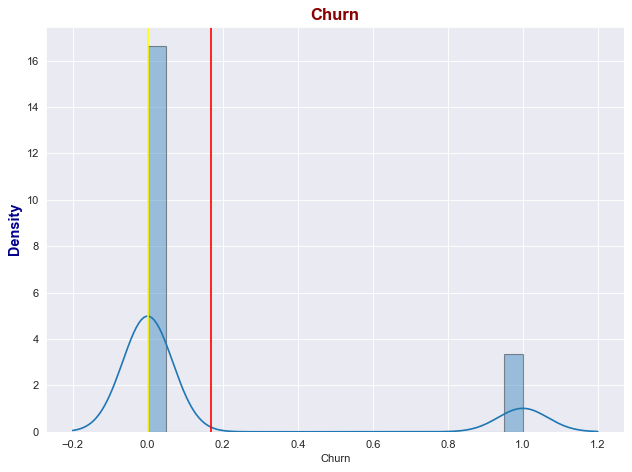

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


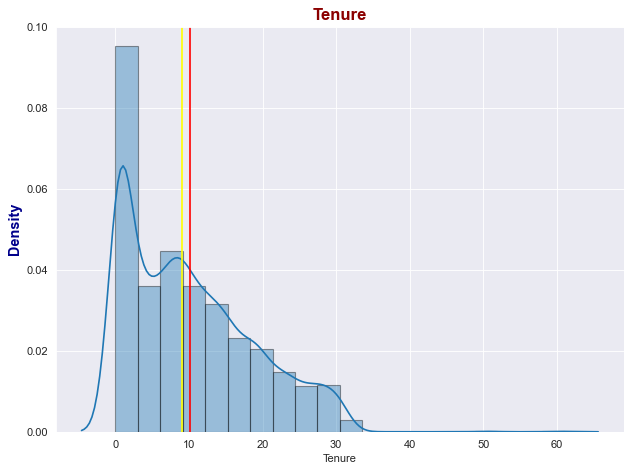

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


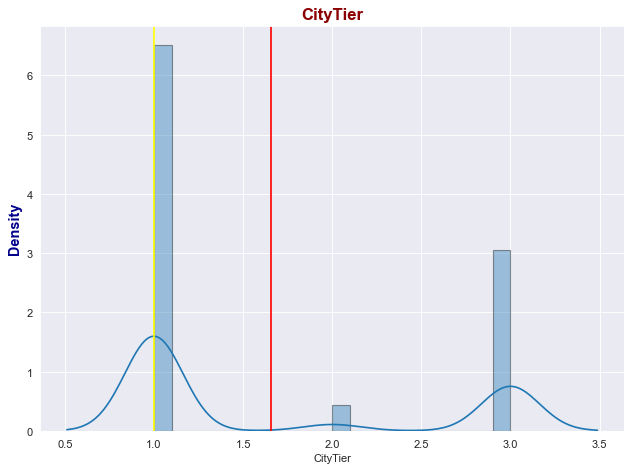

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


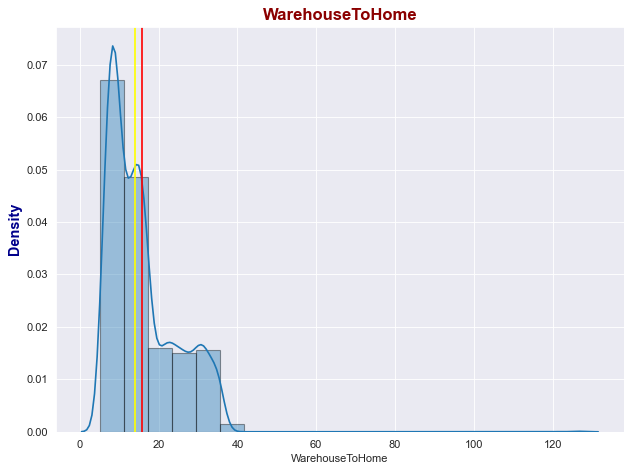

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


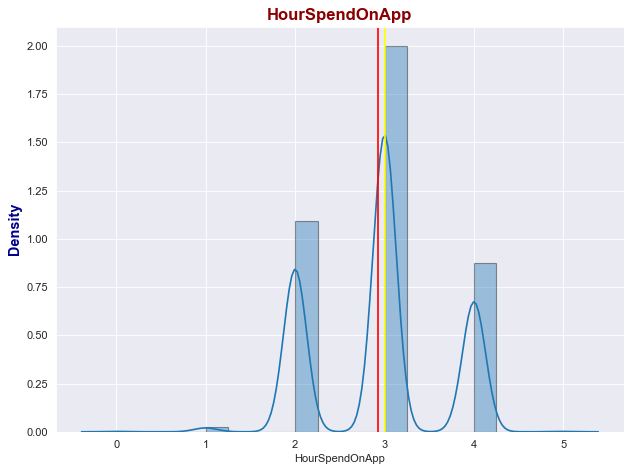

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


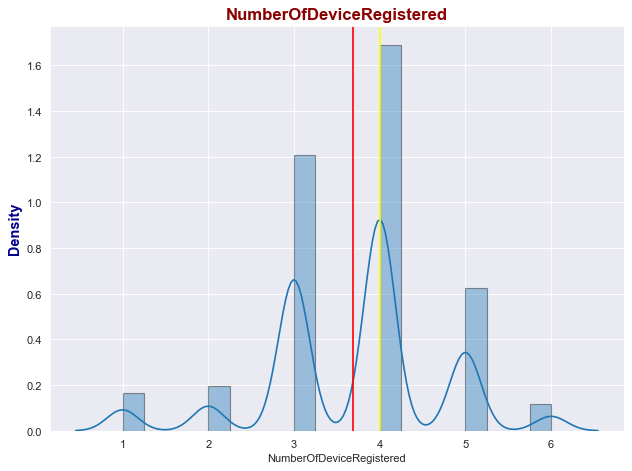

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


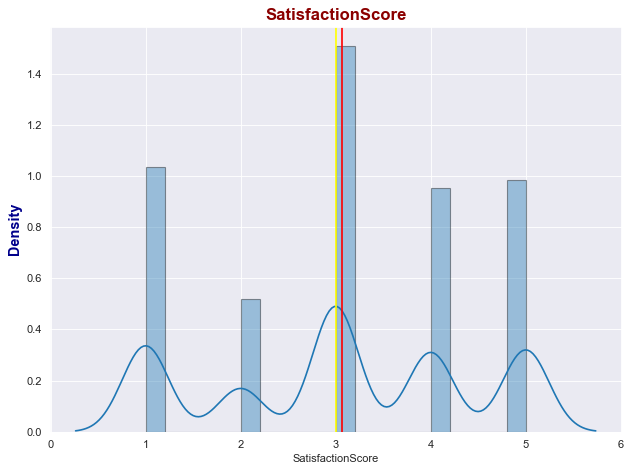

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


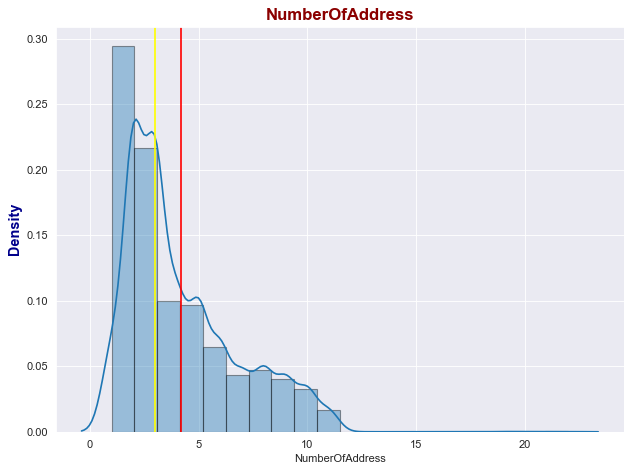

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


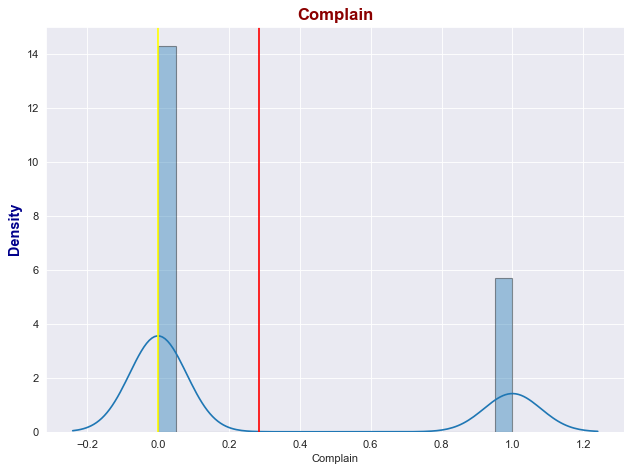

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


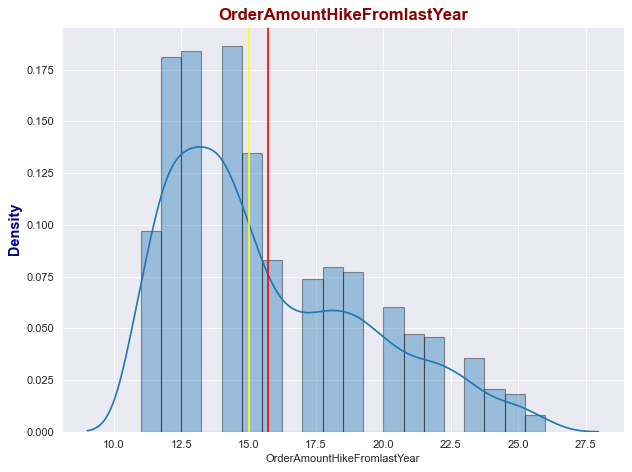

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


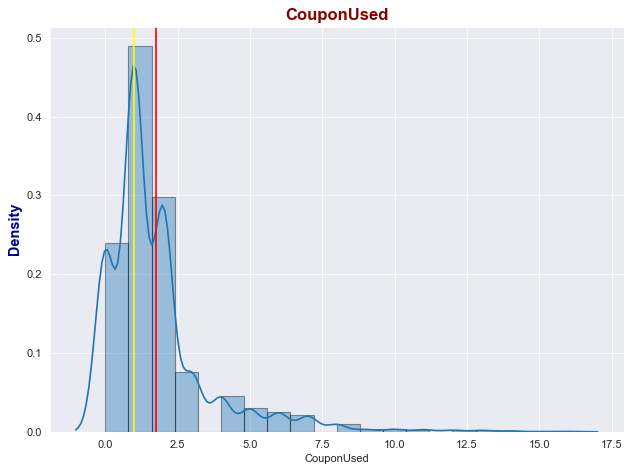

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


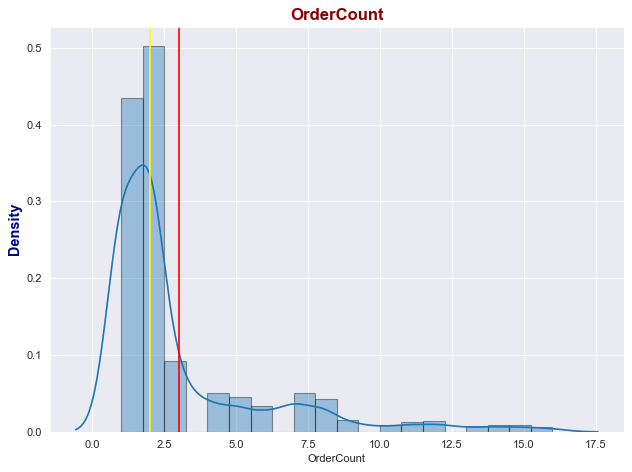

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


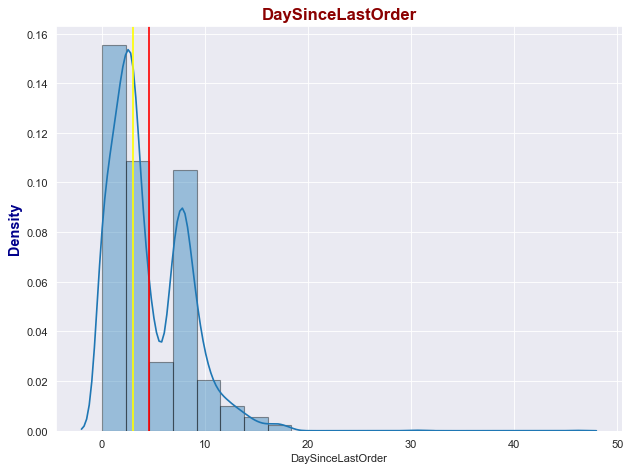

C:\Users\Donny\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


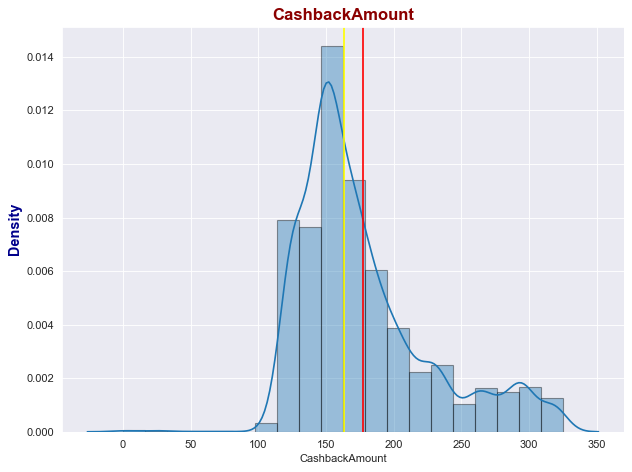

In [29]:
# Variabel Numerik (Analysis dengan Distplot)
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i in list(num):
    plt.figure(figsize = (8, 6), dpi = 80)
    sns.distplot(df2[i], hist_kws = dict(linewidth = 1, edgecolor = "k"), bins = 20)
    
    plt.axvline(df2[i].describe()['mean'], color = 'red', label = 'mean')
    plt.axvline(df2[i].describe()['50%'], color = 'yellow', label = 'median')
    
    plt.title(i, fontdict = title_font)
    plt.ylabel("Density", fontdict = axis_font)
    
    plt.tight_layout()
    plt.show()

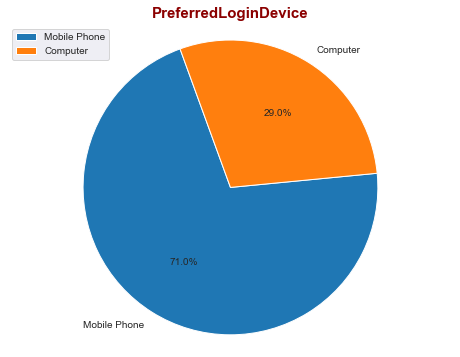

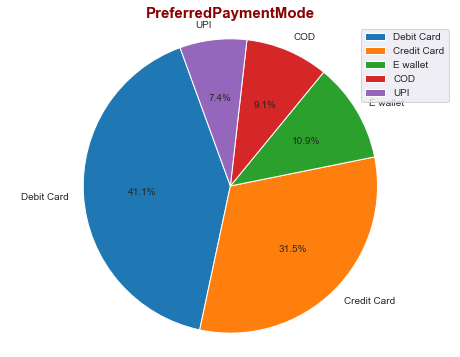

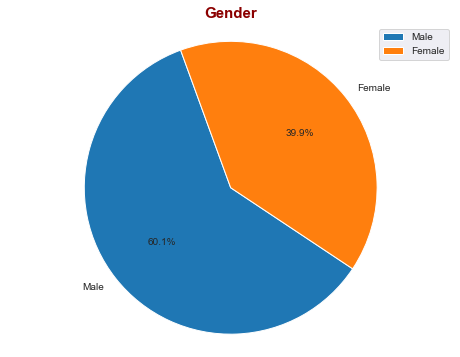

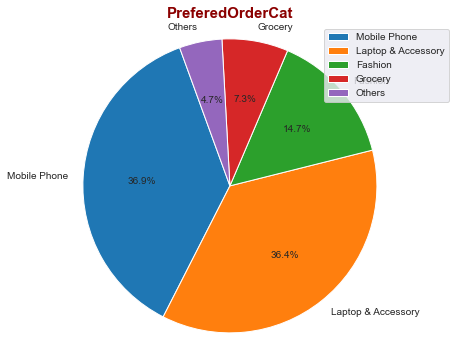

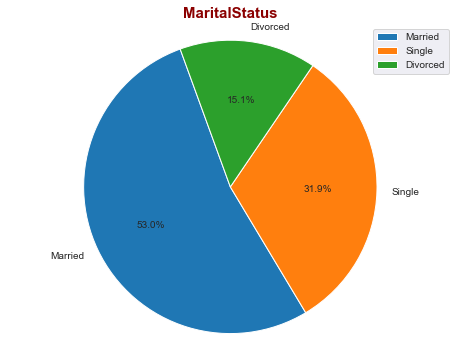

In [32]:
### Variabel Kategori(Analysis dengan Pie Chart)
title_font = {"family" : "arial", "color" : "darkred", "weight" : "bold", "size" : 15}
axis_font = {"family" : "arial", "color" : "darkblue", "weight" : "bold", "size" : 13}

for i in list(cat):
    fig, ax = plt.subplots(figsize = (8, 6))
    
    observation_values = list(df2[i].value_counts().index)
    total_observation_values = list(df2[i].value_counts())
    
    ax.pie(total_observation_values, labels= observation_values, autopct = '%1.1f%%', startangle = 110, labeldistance = 1.1)
    ax.axis("equal") # Equal aspect ratio ensures that pie is drawn as a circle.
    
    plt.title((i), fontdict = title_font)
    plt.legend()
    plt.show()

In [39]:
df_num = df2[num]
df_num.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [44]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
IQR
((df_num < (Q1 - 1.5*IQR))|(df_num > (Q3 + 1.5*IQR))).any()

Churn                           True
Tenure                          True
CityTier                       False
WarehouseToHome                 True
HourSpendOnApp                  True
NumberOfDeviceRegistered        True
SatisfactionScore              False
NumberOfAddress                 True
Complain                       False
OrderAmountHikeFromlastYear     True
CouponUsed                      True
OrderCount                      True
DaySinceLastOrder               True
CashbackAmount                  True
dtype: bool

In [ ]:
# Chart Metode Pembayaran Utama Pelanggan
df_chart =df1['PreferredPaymentMode'].value_counts().reset_index()
df_chart.columns = ['mode', 'count']
df_chart 

import plotly.express as px
fig = px.treemap(df_chart, path = ['mode'],
                 values = 'count', 
                 color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

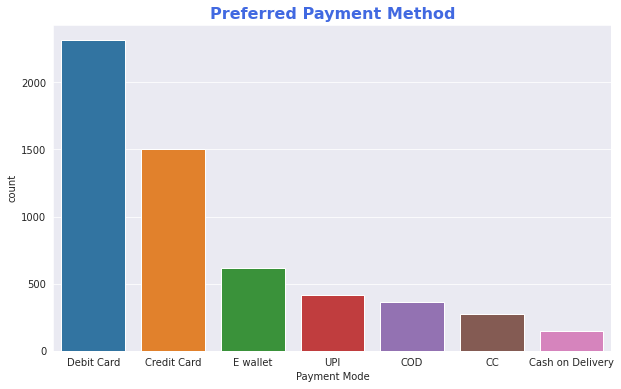

In [ ]:
#Metode pembayaran utama (bar chart)
plt.figure(figsize = (10,6))
sns.barplot(data = pv2, x = 'PreferredPaymentMode', y = 'count', order = pv2.sort_values('count', ascending = False).PreferredPaymentMode)
plt.title('Preferred Payment Method', fontsize = 16, fontweight = 'bold', color = 'royalblue')
plt.xlabel('Payment Mode')
plt.show()


In [ ]:
df_chart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mode    6 non-null      object
 1   count   6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


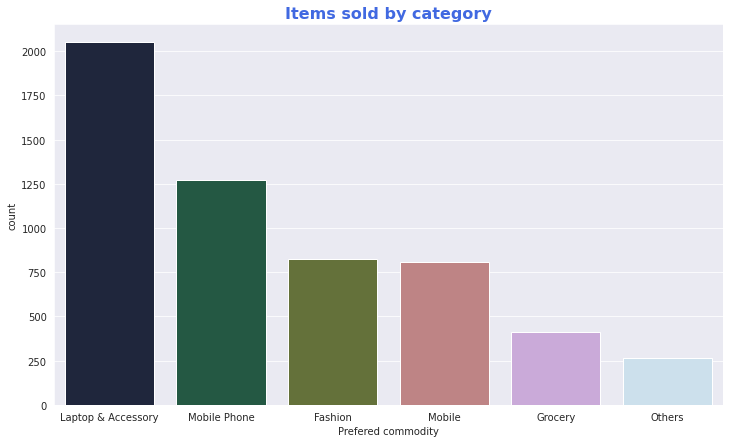

In [ ]:
# Chart Kategori barang yang sering dibeli pelanggan
plt.figure(figsize = (12,7))
sns.countplot(x ='PreferedOrderCat', data = df1,
              palette = 'cubehelix',
              order = df1['PreferedOrderCat'].value_counts().index) 
plt.title('Items sold by category', fontsize = 16, fontweight = 'bold', color = 'royalblue')
plt.xlabel('Prefered commodity');

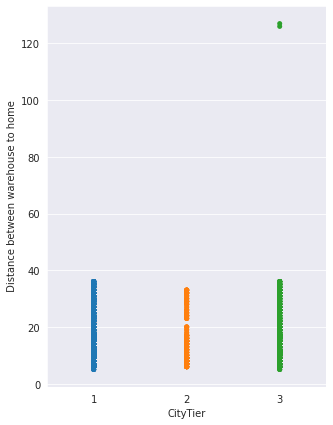

In [ ]:
# Chart jarak antara warehouse dengan rumah pelanggan
df_warehouse = df1.copy()

df_warehouse['CityTier'].astype('str')
plt.figure(figsize = (5,7))
sns.stripplot(x = 'CityTier', y = 'WarehouseToHome', data = df_warehouse, jitter = False)
plt.ylabel(' Distance between warehouse to home');

In [ ]:
ct1 = df1[df1['CityTier'] == 1]
ct2 = df1[df1['CityTier'] == 2]
ct3 = df1[df1['CityTier'] == 3]

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(ct1['WarehouseToHome'])
axs[0].set_title('City Tier 1')

axs[1].hist(ct2['WarehouseToHome'])
axs[1].set_title('City Tier 2')

axs[2].hist(ct3['WarehouseToHome'])
axs[2].set_title('City Tier 3')

plt.show()

In [ ]:
for i in cat:
    print(i)
    print()
    print(df[i].value_counts())
    print()
    print()

PreferredLoginDevice

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64


PreferredPaymentMode

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64


Gender

Male      3384
Female    2246
Name: Gender, dtype: int64


PreferedOrderCat

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64


MaritalStatus

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64




In [ ]:
df[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5365.0,15.707922,3.675485,11.0,13.00,15.00,18.0000,26.00


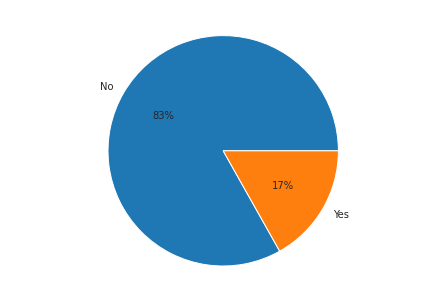

In [ ]:
# Memvisualisasikan Prosentase Churn
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['No','Yes']
explode = [0, 0.05]
churn = df1.Churn.value_counts()
ax.pie(churn, labels=labels, explode = explode, autopct='%.0f%%')
plt.show()

C:\Users\Donny\AppData\Local\Temp\ipykernel_10312\911719197.py:12: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.

2022-10-09 17:06:03,408 - WARNING  - findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


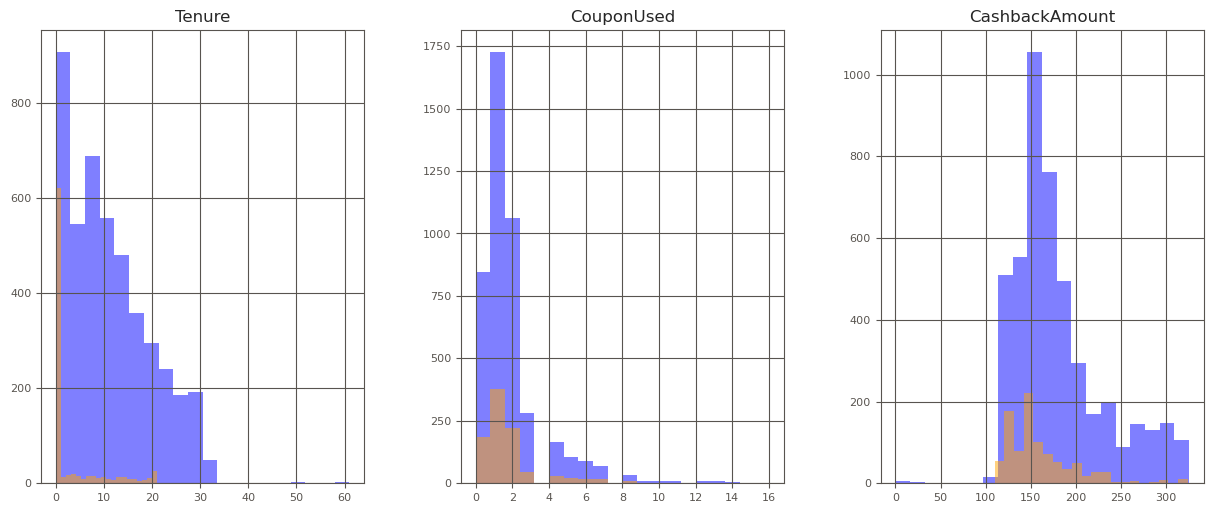

In [49]:
# Memilih variable predictor yang bersifat numerik dan membuat plot secara bivariat, kemudian menginterpretasikannya

# Membuat bin di chart
numerical_features = ['Tenure', 'CouponUsed', 'CashbackAmount']
fig, ax = plt.subplots(1, 3, figsize=(15, 6))

# Gunakan kode berikut untuk memplot dua overlay histogram per masing-masing numerik_fitur, gunakan warna biru dan oranye, masing-masing
df[df.Churn == 0][numerical_features].hist(bins=20, color='blue', alpha=0.5, ax=ax)
df[df.Churn == 1][numerical_features].hist(bins=20, color='orange', alpha=0.5, ax=ax)
plt.show()

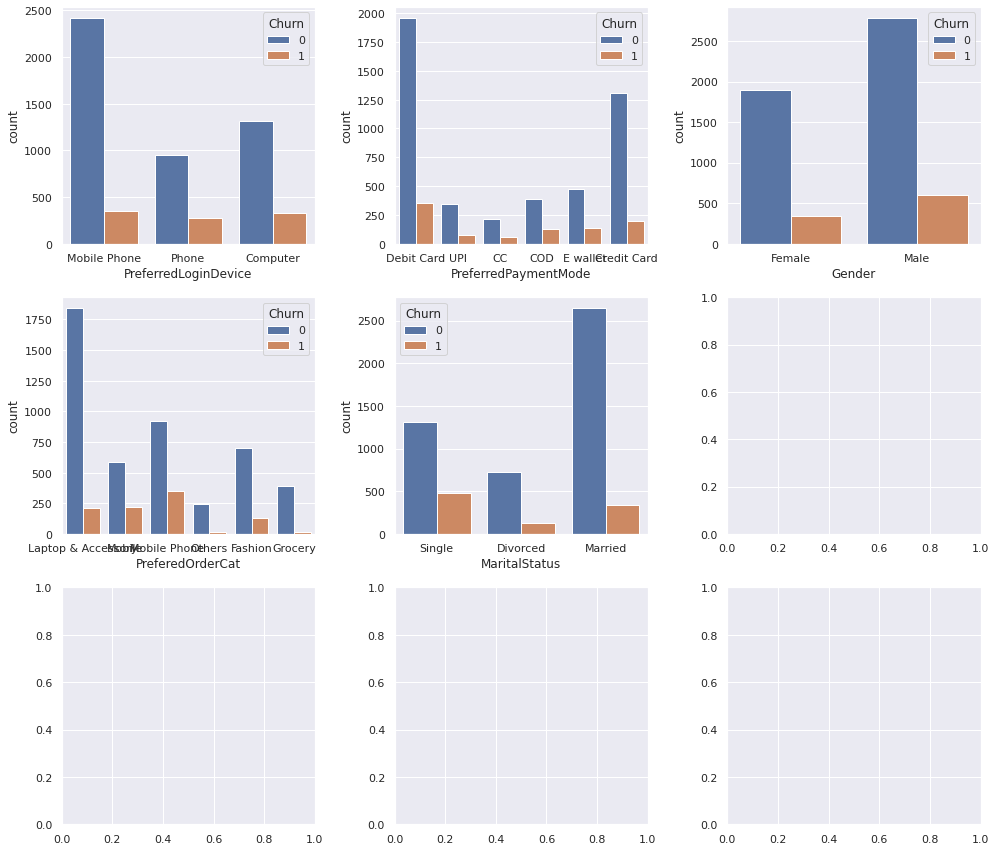

In [ ]:
#Melakukan pemilihan variable predictor yang bersifat kategorik dan membuat plot secara bivariat
sns.set(style='darkgrid')

fig, ax = plt.subplots(2, 3, figsize=(14, 12))
sns.countplot(data=df1, x='PreferredLoginDevice', hue='Churn', ax=ax[0][0])
sns.countplot(data=df1, x='PreferredPaymentMode', hue='Churn', ax=ax[0][1])
sns.countplot(data=df1, x='Gender', hue='Churn', ax=ax[0][2])
sns.countplot(data=df1, x='PreferedOrderCat', hue='Churn', ax=ax[1][0])
sns.countplot(data=df1, x='MaritalStatus', hue='Churn', ax=ax[1][1])
plt.tight_layout()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f028afbe310>,
      dtype=object)

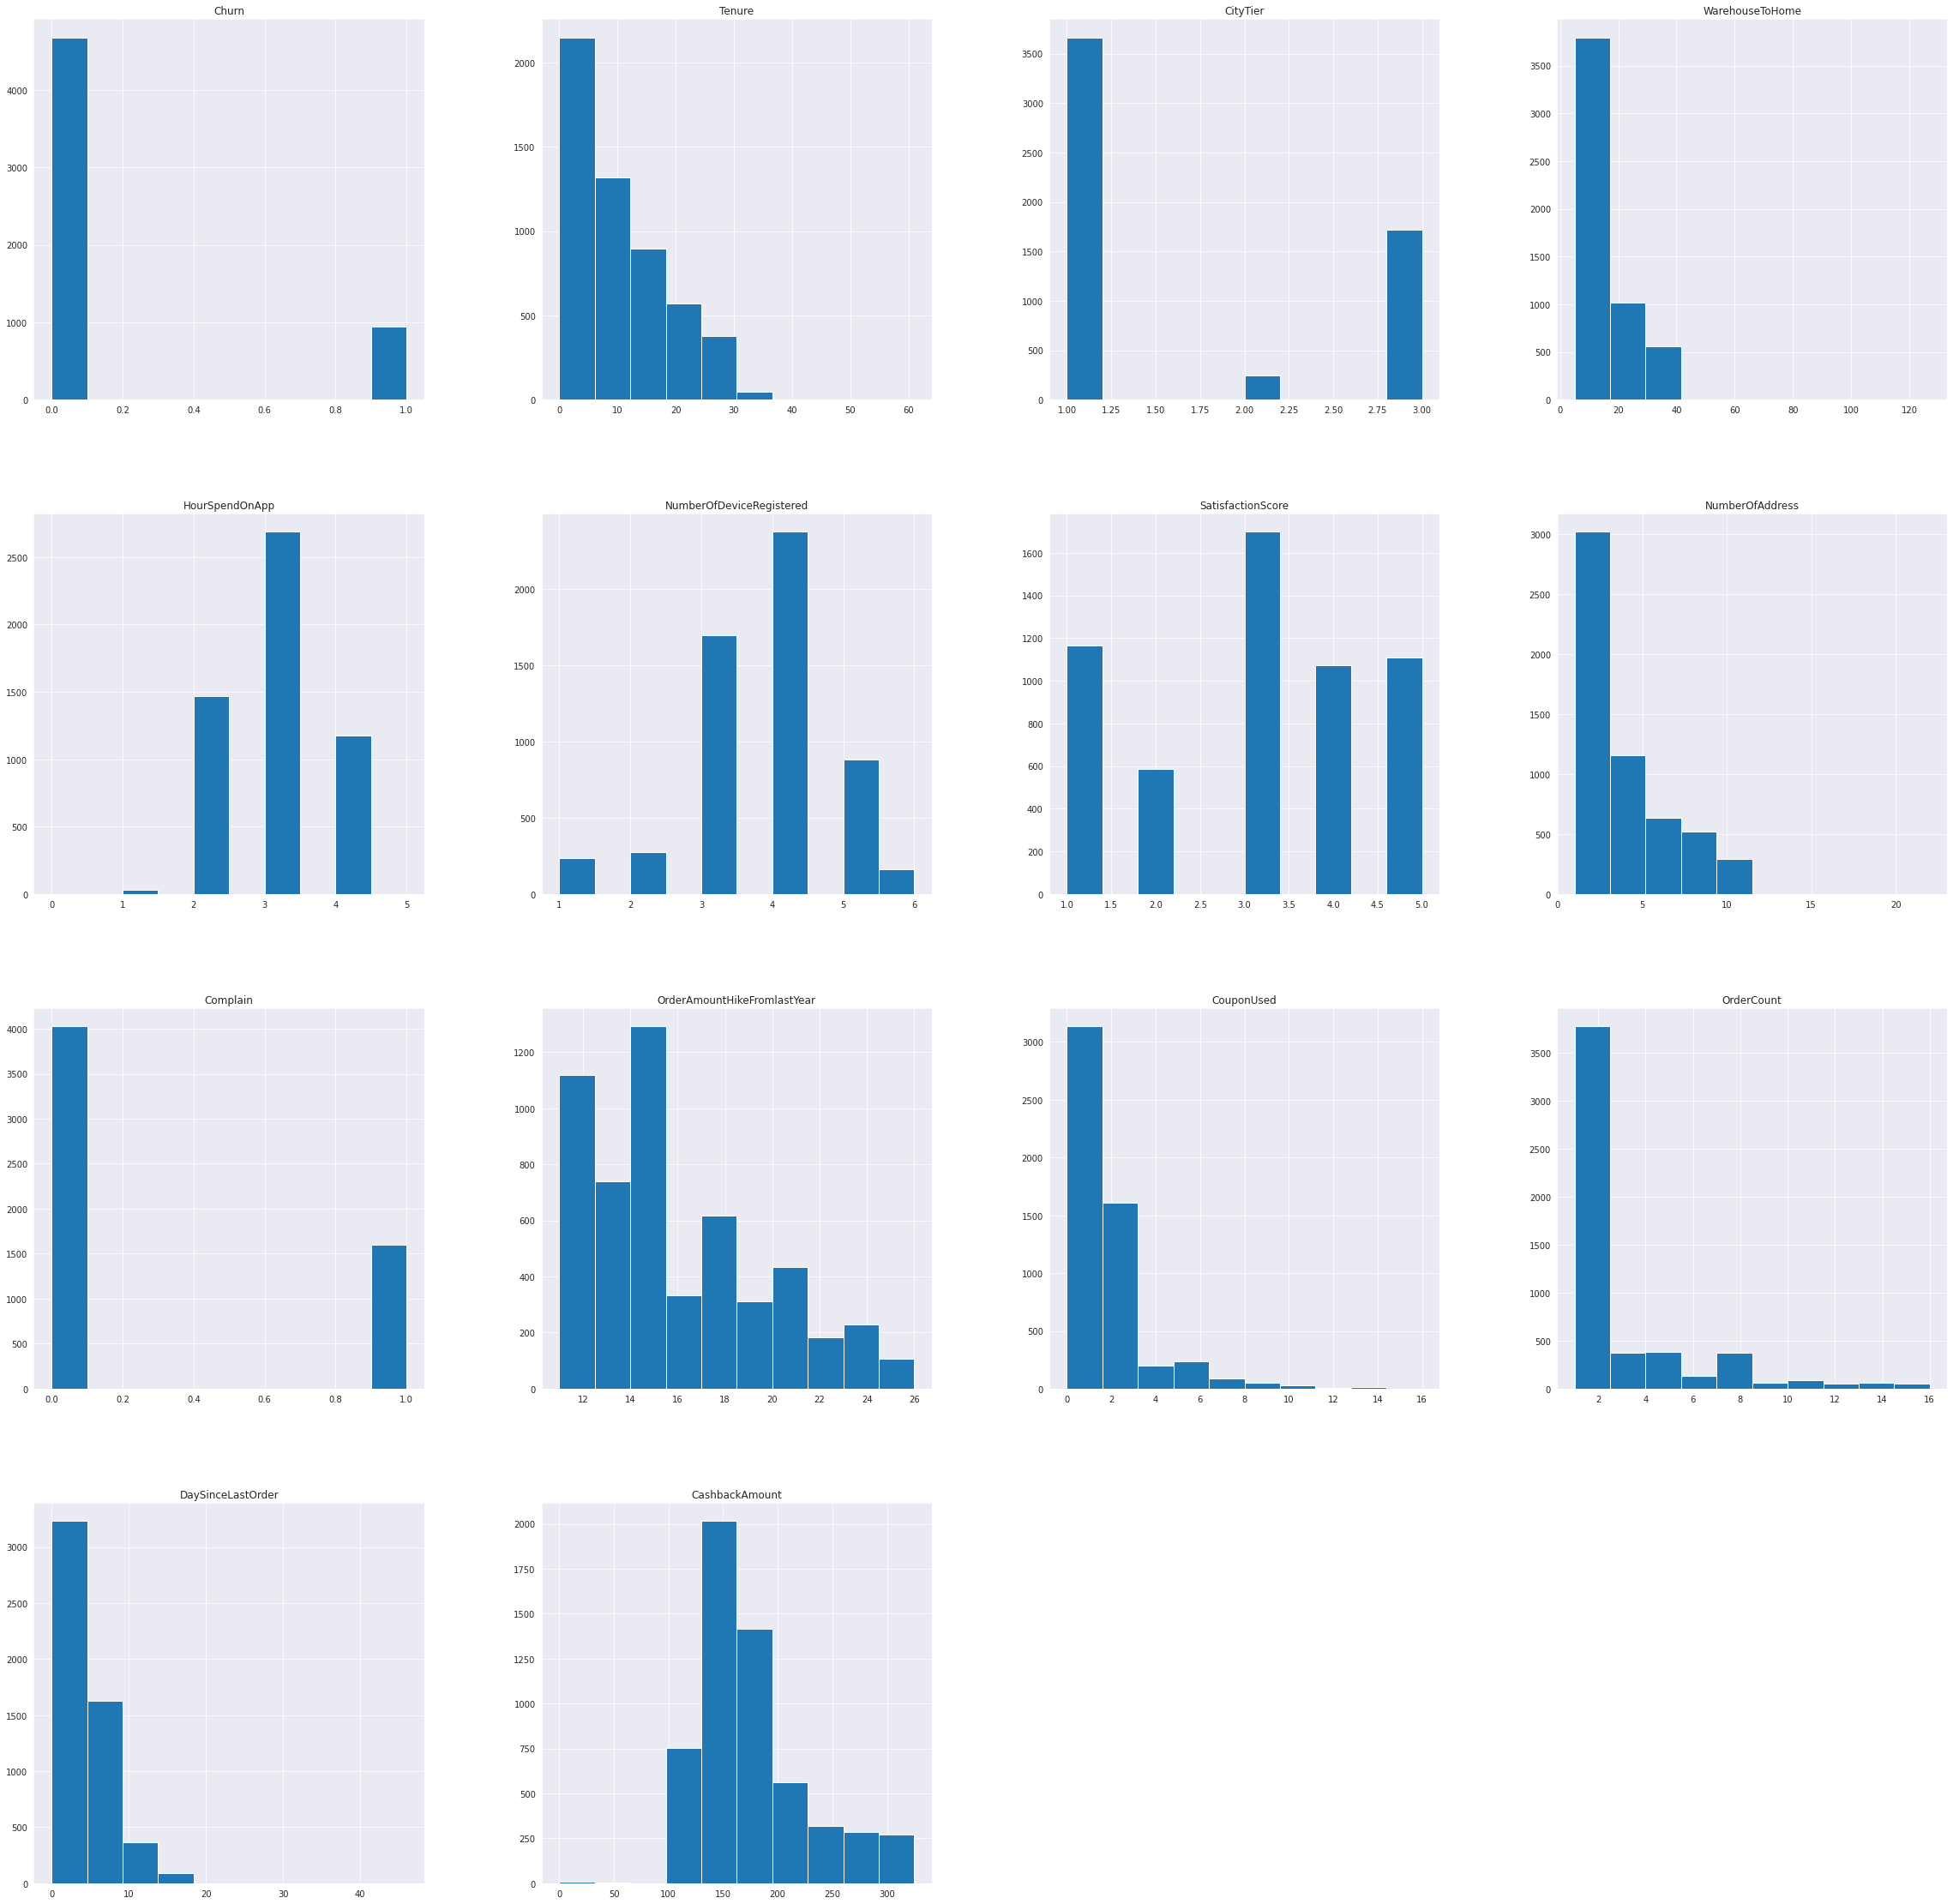

In [ ]:
df1[num].hist(figsize=(40,40))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

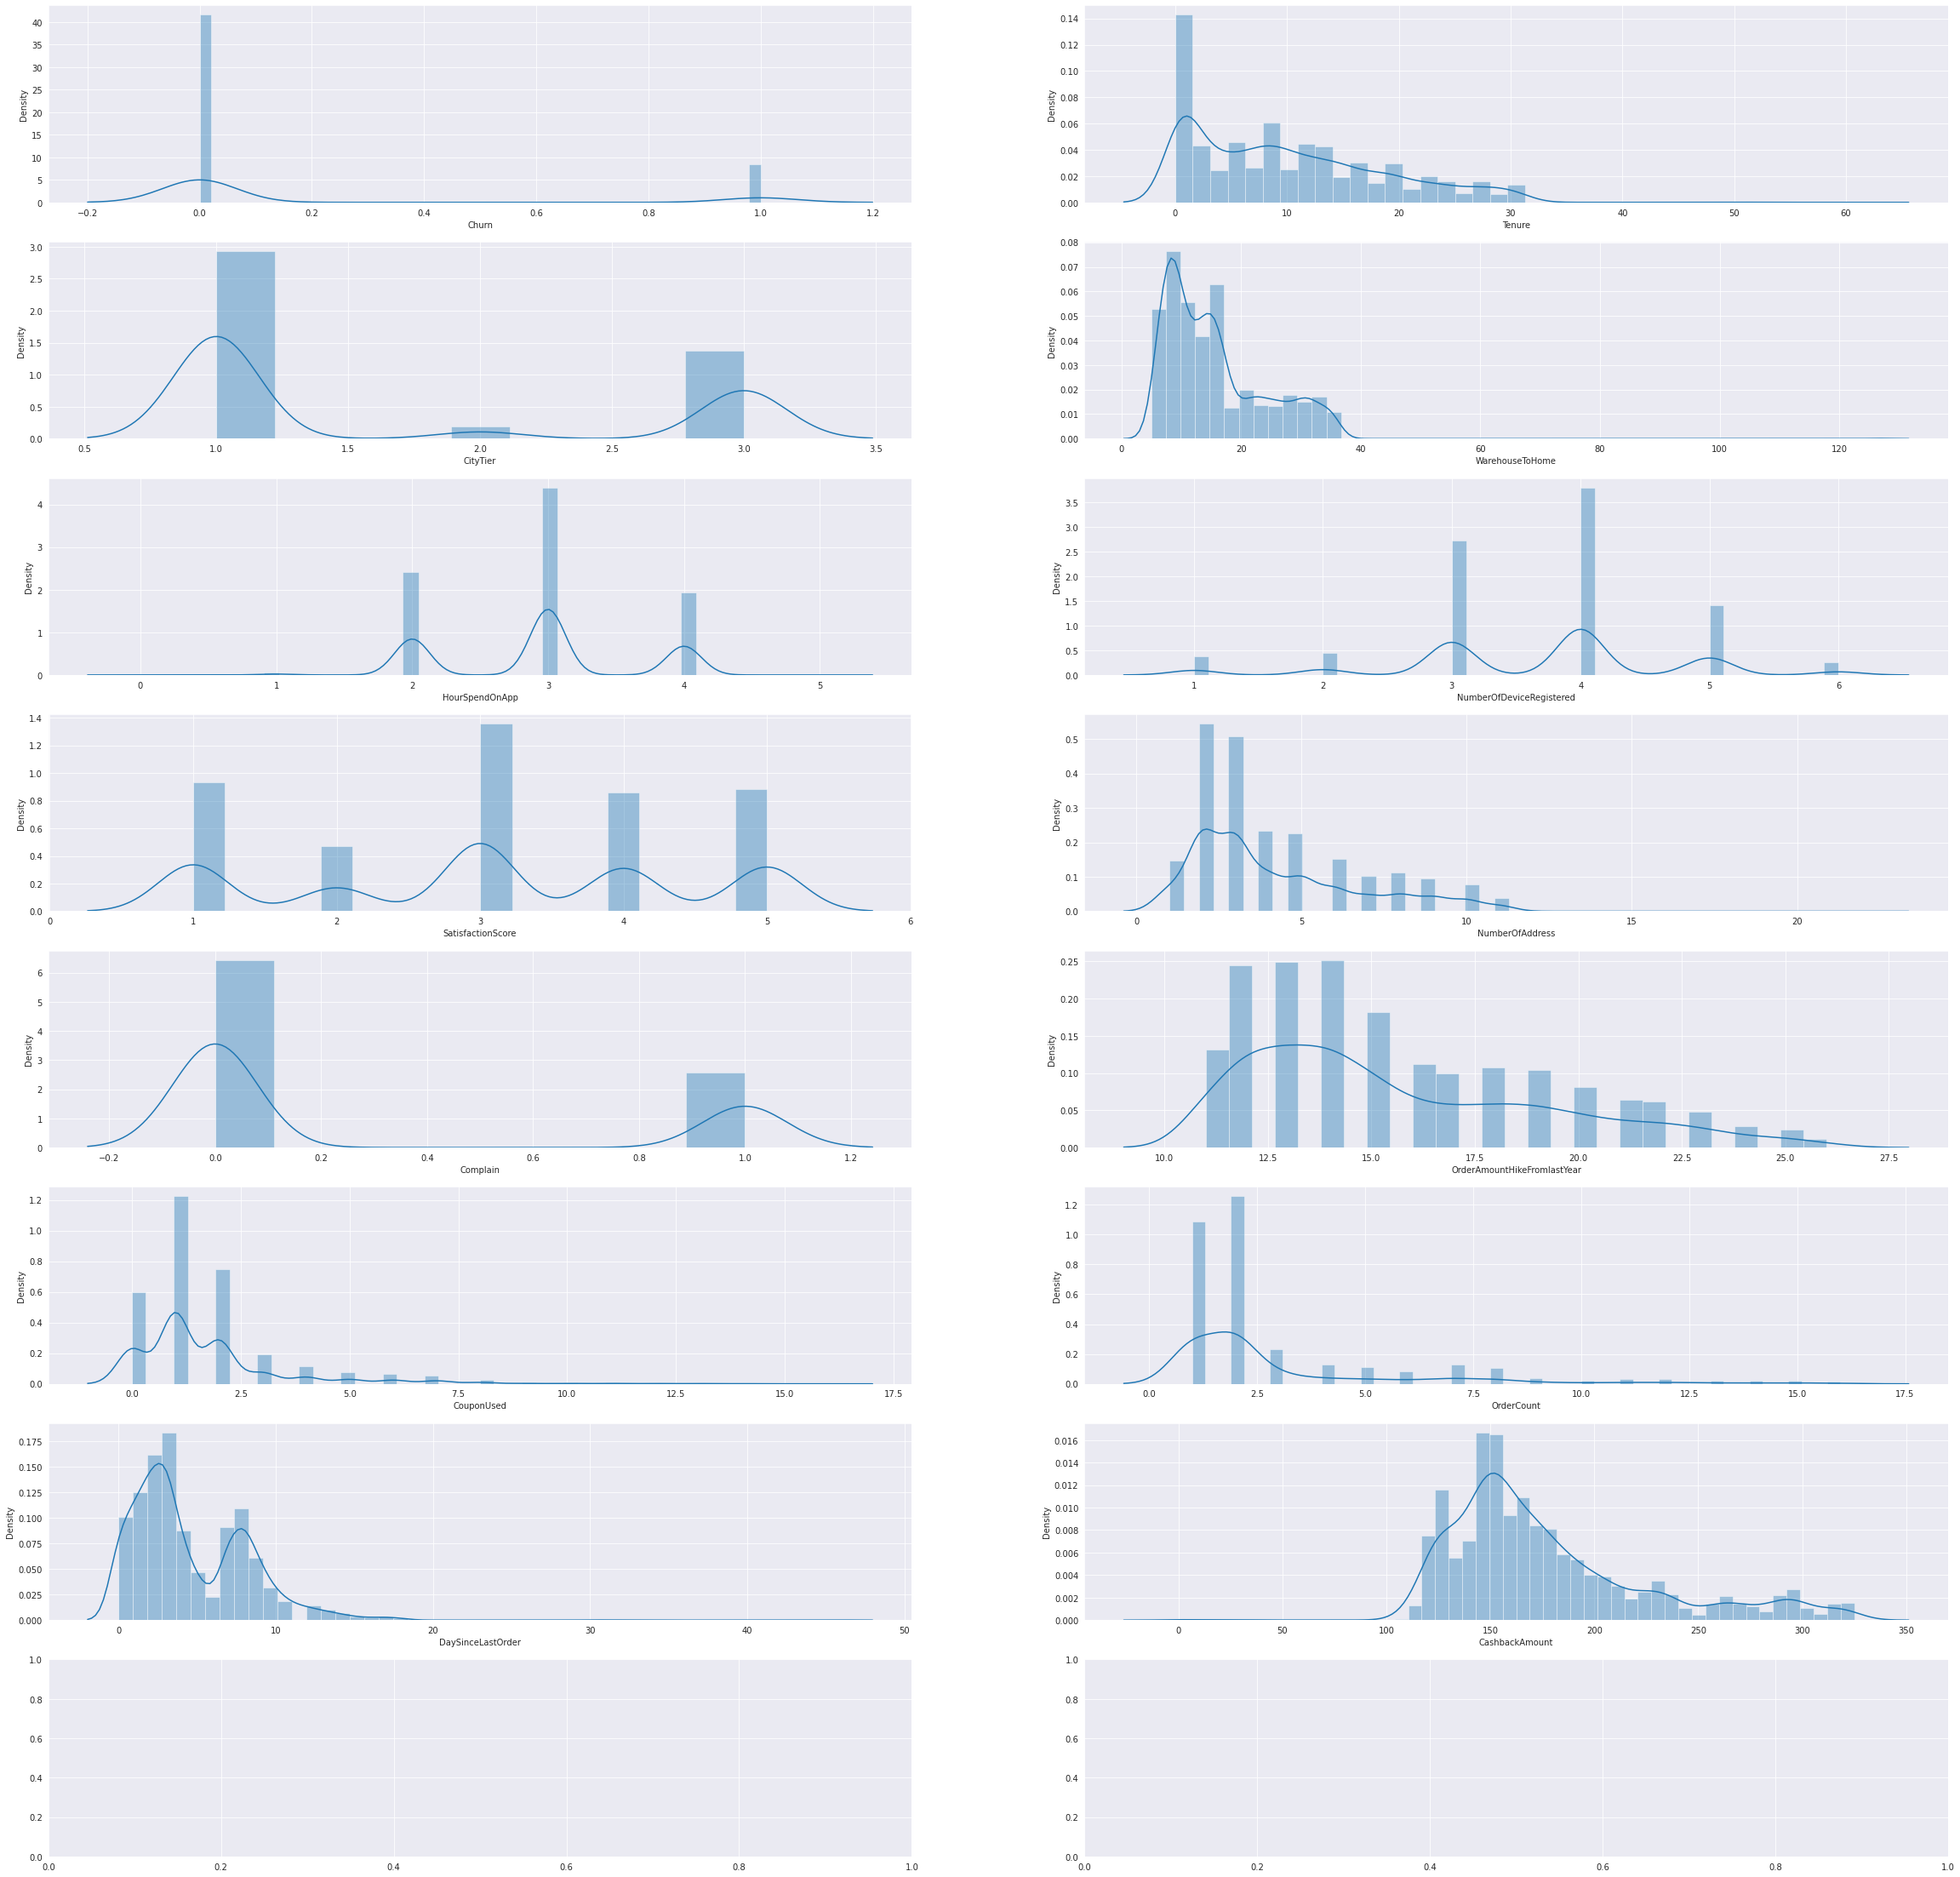

In [ ]:
fig, ax = plt.subplots(8, 2, figsize=(40, 40))
for i, subplot in zip(num, ax.flatten()):
    sns.distplot(df1[i], ax=subplot)

### Bivariate Analysis — analisis relasi dengan dua variabel yang biasanya dengan target variabel.

In [ ]:
#Mendefinisikan tuple untuk menyimpan dataframe yang berisi informasi tentang kontribusi setiap nilai ke churn pelanggan.
d={}

for i in df1.columns:
    d[i] = pd.concat([df1.groupby(i).Churn.sum(),df1[i].value_counts(),round(df1.groupby(i).Churn.sum()*100/df1[i].value_counts(),2)], axis=1)
    d[i].reset_index(level=0,inplace=True)
    d[i] = d[i].rename(columns = {'index':i, 'Churn':'Customers_churned', i:'Total_Customers', 0:'perc_of_total_cust'}, )

In [ ]:
for i in df1.columns:
    print(i)
    print(d[i])
    print()

Churn
   Churn  Total_Customers  Total_Customers  Total_Customers
0      0                0             4682              0.0
1      1              948              948            100.0

Tenure
    Tenure  Customers_churned  Total_Customers  perc_of_total_cust
0      0.0                272              508               53.54
1      1.0                349              690               50.58
2      2.0                 14              167                8.38
3      3.0                 18              195                9.23
4      4.0                 20              203                9.85
5      5.0                 16              204                7.84
6      6.0                  8              183                4.37
7      7.0                 16              221                7.24
8      8.0                 16              263                6.08
9      9.0                 12              247                4.86
10    10.0                 14              213                6.57
11

In [ ]:
def analysis_chart(variable):
  # definig the plot for matplotlib
  plt.figure(figsize=(20,12))
  fig, ax = plt.subplots()
  # defining the title
  title1 = 'Customers Churn analysed by ' + variable
  plt.title(title1)
  # defining the lines for the y -axis
  line1 = ax.plot(d[variable][variable],d[variable]['Customers_churned'], color='lightskyblue', label = 'Customers churned')
  line2 = ax.plot(d[variable][variable],d[variable]['Total_Customers'], color='dodgerblue', label = 'Total Customers')
  # labelling the x -axis and y-axis
  plt.xlabel (variable)
  plt.ylabel ('No. of customers')
  # rotating the labels on the x-axis for better visualisation
  for tick in ax.get_xticklabels():
    tick.set_rotation(45)
  # defining another axis on the right side of the graph
  ax2=ax.twinx()
  # defining the line for the right side y -axis
  line3 = ax2.plot(d[variable][variable],d[variable]['perc_of_total_cust'], color='yellowgreen', label = 'Churn as Percent of total')
  y = 0*d[variable]['perc_of_total_cust']+20.25
  line4 = ax2.plot(d[variable][variable], y, color='orangered', label='Average customer Churn', linestyle='dashed')
  # labelling the right side y-axis
  plt.ylabel ('percentage of customers churned')
  # adding the three lines to show the legend on the right corner in a coherent place, not doing this will lead to overlapping of legends of lines belonging to left and right y axis
  lines = line1+line2+line3+line4
  labs = [l.get_label() for l in lines]
  ax.legend(lines, labs, bbox_to_anchor=(1.7, 1))
  # adding sns palette for better visualisation
  sns.despine(ax=ax, right=True, left=True)
  sns.despine(ax=ax2, left=True, right=False)

In [ ]:
col = ['Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder']

<Figure size 1440x864 with 0 Axes>

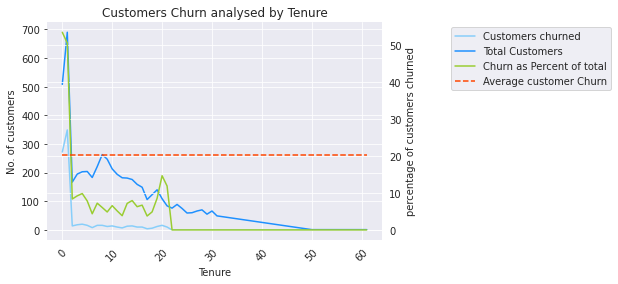

In [ ]:
analysis_chart('Tenure')

<Figure size 1440x864 with 0 Axes>

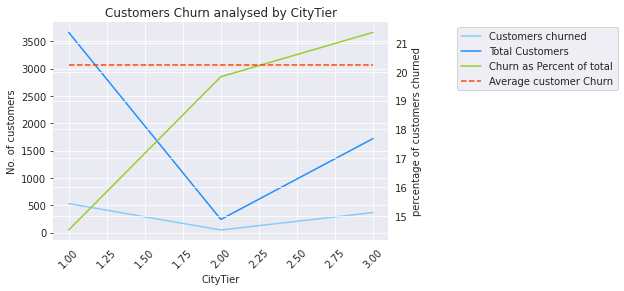

In [ ]:
analysis_chart('CityTier')
plt.xticks([1,2,3])
plt.show()

<Figure size 1440x864 with 0 Axes>

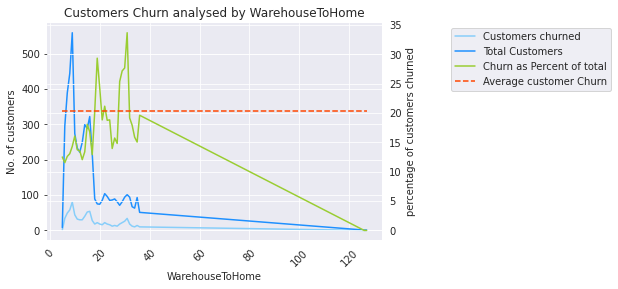

In [ ]:
analysis_chart('WarehouseToHome')

<Figure size 1440x864 with 0 Axes>

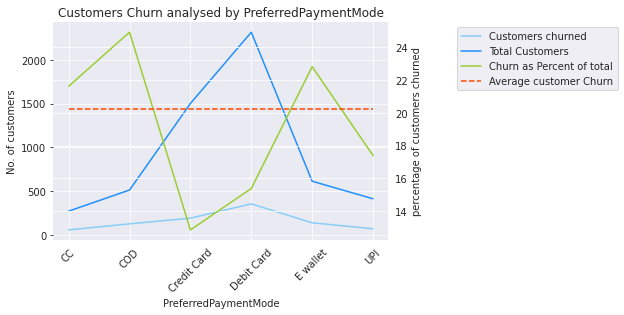

In [ ]:
analysis_chart('PreferredPaymentMode')

<Figure size 1440x864 with 0 Axes>

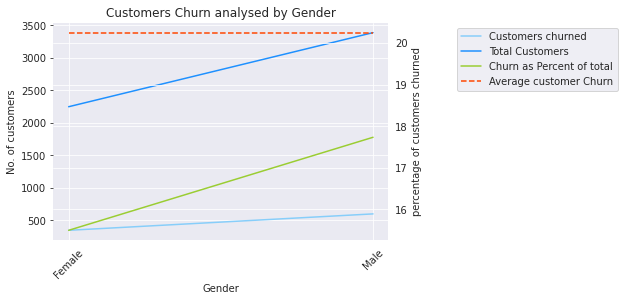

In [ ]:
analysis_chart('Gender')

<Figure size 1440x864 with 0 Axes>

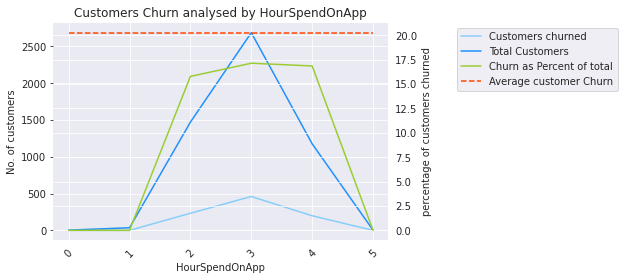

In [ ]:
analysis_chart('HourSpendOnApp')

<Figure size 1440x864 with 0 Axes>

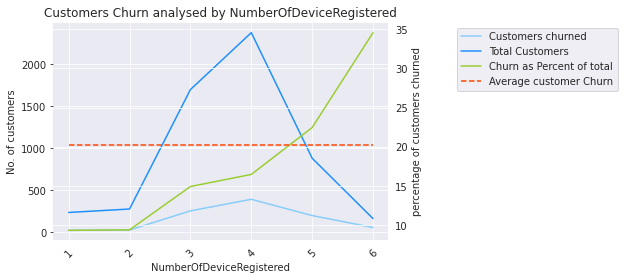

In [ ]:
analysis_chart('NumberOfDeviceRegistered')

<Figure size 1440x864 with 0 Axes>

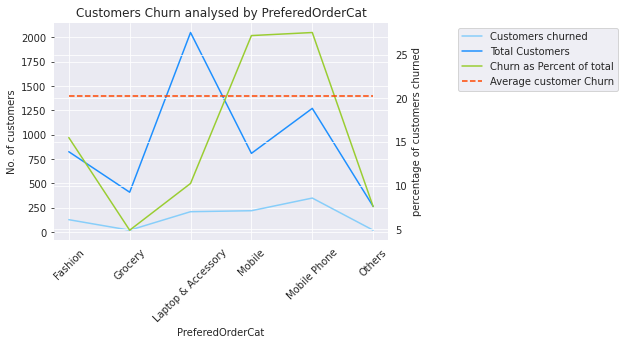

In [ ]:
analysis_chart('PreferedOrderCat')

In [ ]:
df1['SatisfactionScore'].unique()

<Figure size 1440x864 with 0 Axes>

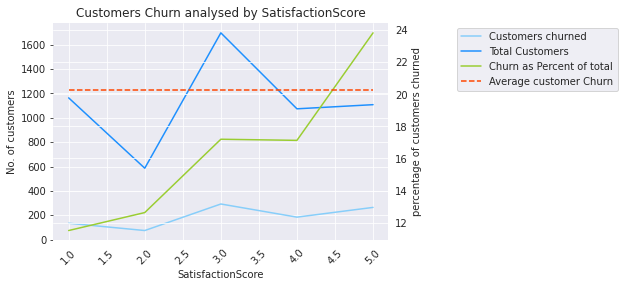

In [ ]:
analysis_chart('SatisfactionScore')
plt.xticks([1, 2, 3, 4, 5])
plt.show()

<Figure size 1440x864 with 0 Axes>

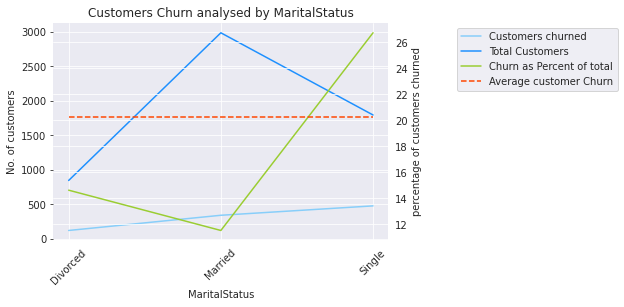

In [ ]:
analysis_chart('MaritalStatus')

<Figure size 1440x864 with 0 Axes>

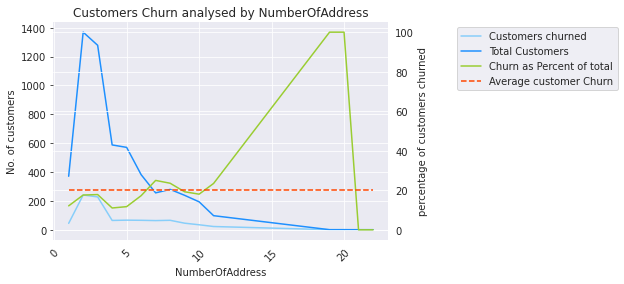

In [ ]:
analysis_chart('NumberOfAddress')

<Figure size 1440x864 with 0 Axes>

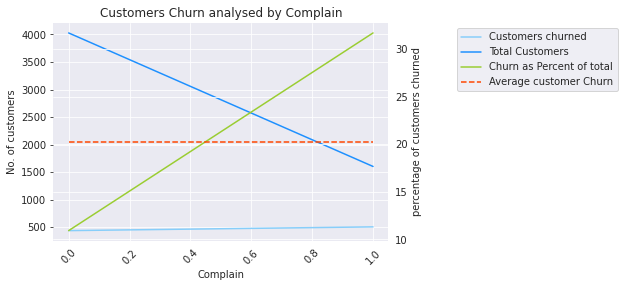

In [ ]:
analysis_chart('Complain')
plt.xticks([0,1])
plt.show()

<Figure size 1440x864 with 0 Axes>

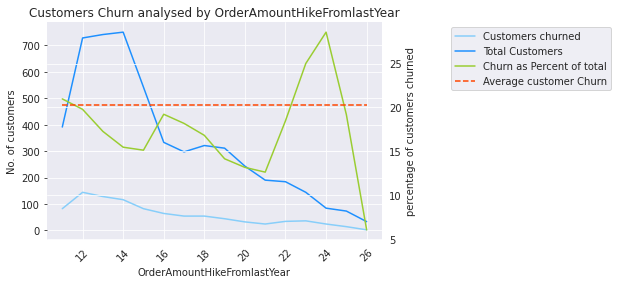

In [ ]:
analysis_chart('OrderAmountHikeFromlastYear')

<Figure size 1440x864 with 0 Axes>

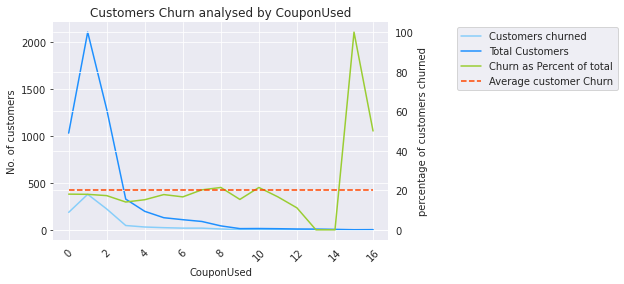

In [ ]:
analysis_chart('CouponUsed')

<Figure size 1440x864 with 0 Axes>

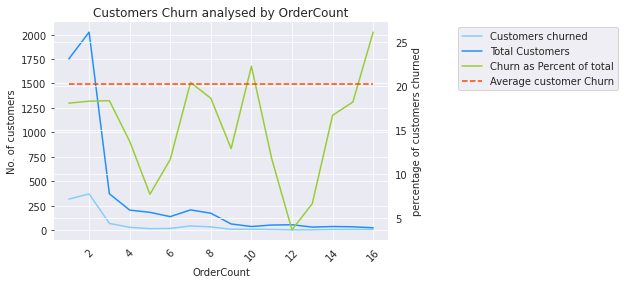

In [ ]:
analysis_chart('OrderCount')

<Figure size 1440x864 with 0 Axes>

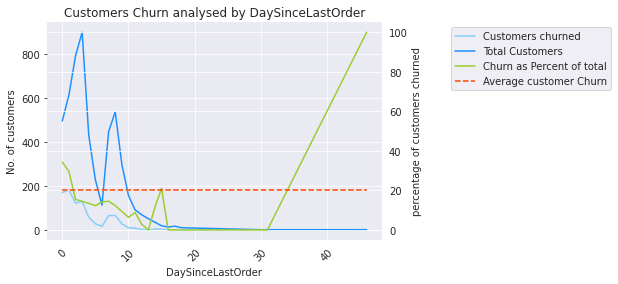

In [ ]:
analysis_chart('DaySinceLastOrder')

Saat melakukan analisis bivariat antara dua variabel kontinu, kita harus melihat dengan scatter plot.

Scatter plot menunjukkan hubungan antara dua variabel tetapi tidak menunjukkan kekuatan hubungan di antara keduanya. 

Untuk mencari kekuatan hubungan, kami menggunakan Korelasi.
Korelasi bervariasi antara -1 dan +1
-1 = korelasi linier negatif sempurna
+1 = korelasi linier positif sempurna
0 = tidak ada korelasi

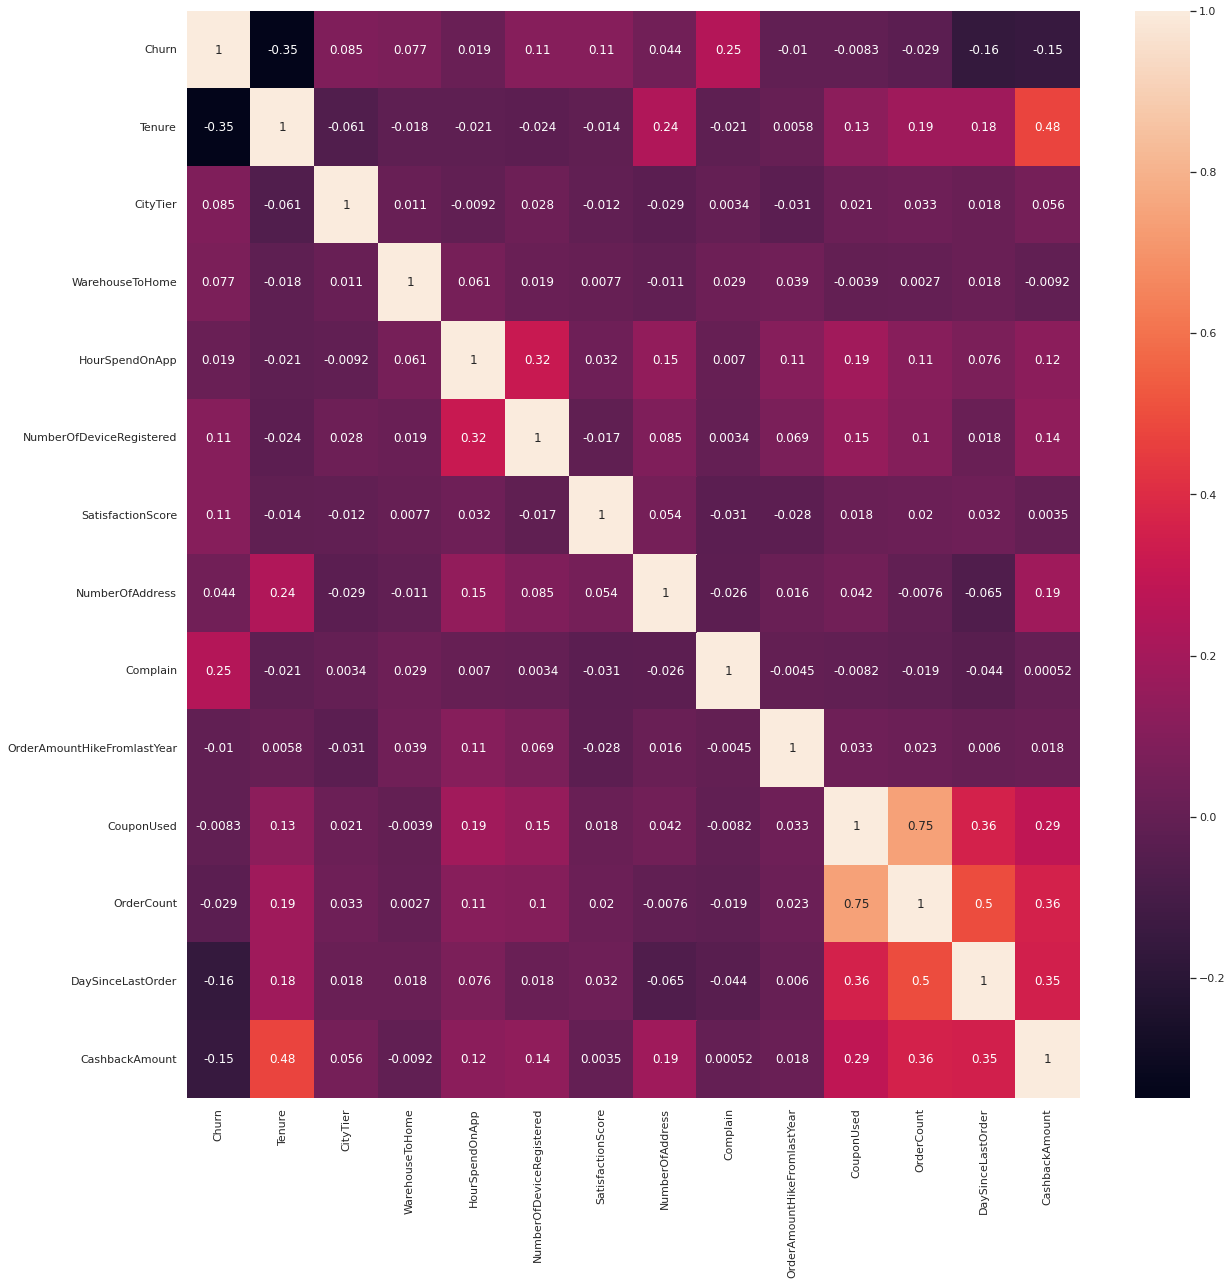

In [ ]:
#Correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(df1.corr(),annot=True)

C:\Users\Donny\AppData\Local\Temp\ipykernel_10312\2533464938.py:12: UserWarning:

Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.



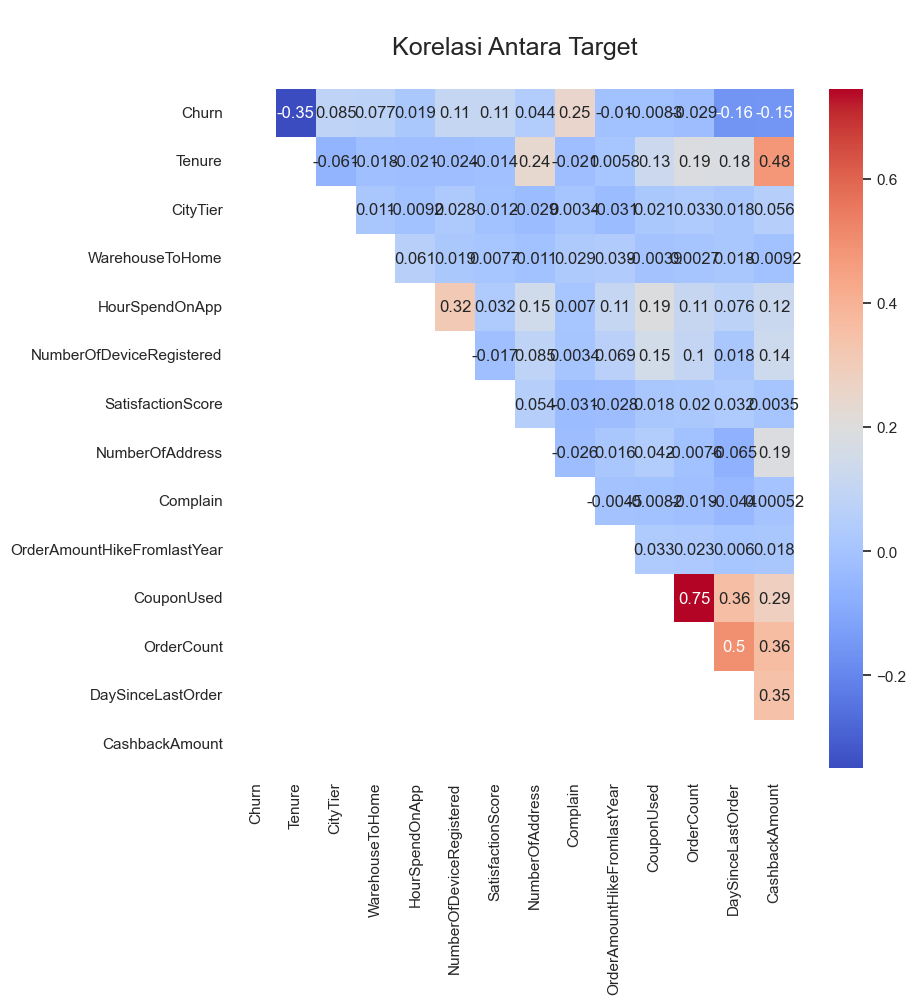

In [50]:
def half_corr_heatmap(data, title=None):
    plt.figure(figsize=(9,9))
    sns.set(font_scale=1)
    
    mask = np.zeros_like(data.corr())
    mask[np.tril_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(data.corr(), mask=mask, annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    plt.show()
    return

half_corr_heatmap(df1, 'Korelasi Antara Target')

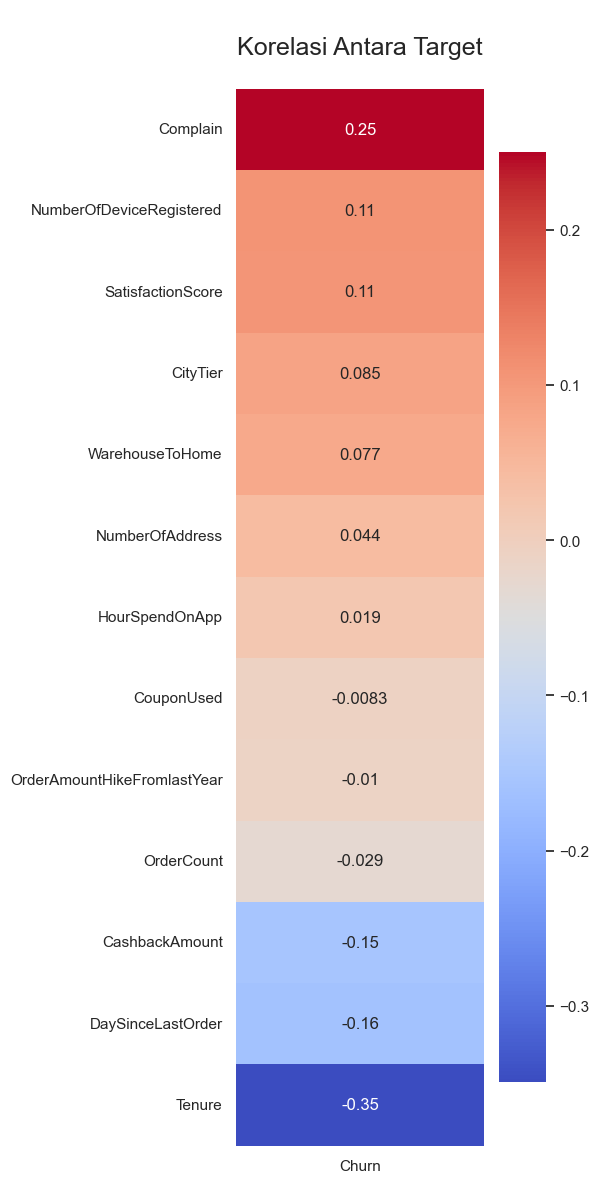

In [51]:
def corr_for_target(data, target, title=None):
    plt.figure(figsize=(4,14))
    sns.set(font_scale=1)
    
    sns.heatmap(data.corr()[[target]].sort_values(target, ascending=False)[1:], annot=True, cmap="coolwarm")
    
    if title: plt.title(f"\n{title}\n", fontsize=18)
    return

corr_for_target(df1, 'Churn', 'Korelasi Antara Target')

Analisis korelasi menjelaskan ada atau tidaknya hubungan antar dua variabel. Nilai Korelasi bisa positif atau negatif atau lemah. Korelasi positif yang artinya jika penambahan pada nilai X maka bertambah juga nilai Y. Korelasi negatif menjelaskan hubungan setiap kenaikan nilai X maka ada penurunan pada nilai Y. Korelasi yang lemah menjelaskan dua variabel ini tidak ada hubungannya sama sekali. Biasanya korelasi dikatakan sangat kuat jika nilainya melebihi 0.7 jika kurang dari tersebut korelasi antar dua variabel tersebut lemah.

### Kesimpulan hasil EDA:
*  Variabel yang distribusinya skew:
   *  Tenure
   *  WarehouseToHome
   *  NumberOfAddress
   *  OrderAmountHikeFromlastYear
   *  CouponUsed
   *  OrderCount
   *  DaySinceLastOrder
   *  CashbackAmount
*  Variabel numerik yang mempunyai nilai Outlier
   *  Churn
   *  Tenure
   *  WarehouseToHome
   *  HourSpendOnOnApp
   *  NumberOfDeviceRegistered
   *  NumberOfAddress
   *  OrderAmountHikeFromlastYear
   *  CouponUsed
   *  OrderCount
   *  DaySinceLastOrder
   *  CashbackAmount
*  Sebaran data secara kesuluruhan pelanggan tidak melakukan churn, dengan detil Churn sebanyak 17% dan No Churn sebanyak 83%.
*  Untuk tenure, pelanggan berlangganan  paling sebentar mempunyai kecenderungan untuk melakukan Churn.
*  Ada kecenderungan semakin tinggi kupon yang digunakan, semakin tinggi juga kecenderungan untuk melakukan Churn. 
*  Dilihat dari perangkat yang digunakan untuk login, mobile phone merupakan pilihan orang yang melakukan churn.
*  Dilihat dari metode pembayaran, yang sering digunakan oleh pelanggan yang churn adalah debit card.
*  Orang melakukan churn dilihat dari faktor jenis kelamin (gender), pria lebih sering melakukan churn.
*  Pelanggan dengan status single merupakan pelanggan yang sering melakukan churn.
*  Kolom Churn adalah variabel target yang menunjukkan apakah pelanggan pergi (yaitu meninggalkan perusahaan).
*  Korelasi yang perlu diperhatikan adalah CouponUsed dan OrderCount → 0.75

## Business Insight
Bersumber dari laman CleverTap, mendapatkan pelanggan baru umumnya akan lebih mahal sebanyak 5 hingga 25 kali lipat jika dibandingkan dengan mempertahankan pelanggan yang sudah ada. Selain itu, mempertahankan pelanggan juga diklaim mampu memberikan dampak yang sangat besar pada growth rate daripada mendapatkan pelanggan baru.
Hal pertama yang harus Anda ketahui untuk  meminimalisir persentase churn rate adalah penyebab utama dari presentase tersebut bisa di atasi. 
-  Hal tersebut bisa datang dari UI atau UX Anda yang kurang ramah untuk pengguna, keterbatasan fitur, ini perlu dilakukan pengembangan lebih lanjut karena hasil EDA menunjukan pelanggan paling banyak menggunakan mobile phone untuk mengakses layanan.
-  Member dengan waktu paling singkat menunjukan churn yang tinggi mungkin juga disebabkan factor UI/UX seperti yang disebutkan diatas. Disarankan juga memperbanyak penawaran menarik agar masa berlangganan pelanggan bisa bertahan lama
Perusahaan juga perlu memperbanyak jumlah cashback untuk pelanggan setia atau pelanggan yang melakukan pembelanjaan dengan nominal tertentu
-  Memperbanyak pilihan produk pada kategori mobile phone dengan harga yang bersaing
-  Membuat diskon tambahan bagi pemegang kartu debit
-  Membuat acara live event yang dapat membuat pelanggan terutama pria untuk tetap setia jadi pelanggan perusahaan kita.
-  Memperbaiki Journey Map pelanggan, agar perusahaan dapat memperbaiki langkah-langkah yang menyebabkan pelanggan menjadi churn, seperti sulitnya untuk mengakses menu diaplikasi, dan perusahaan dapat mendefinisikan Kembali pelanggan ideal untuk perusahaan agar bagian marketing/sales tidak salah dalam mendapatkan pelanggan.